In [2]:
from dotenv import load_dotenv

load_dotenv()

True

# Extract the paper and generate the sections we want to cover for the paper

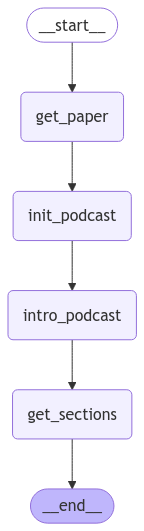

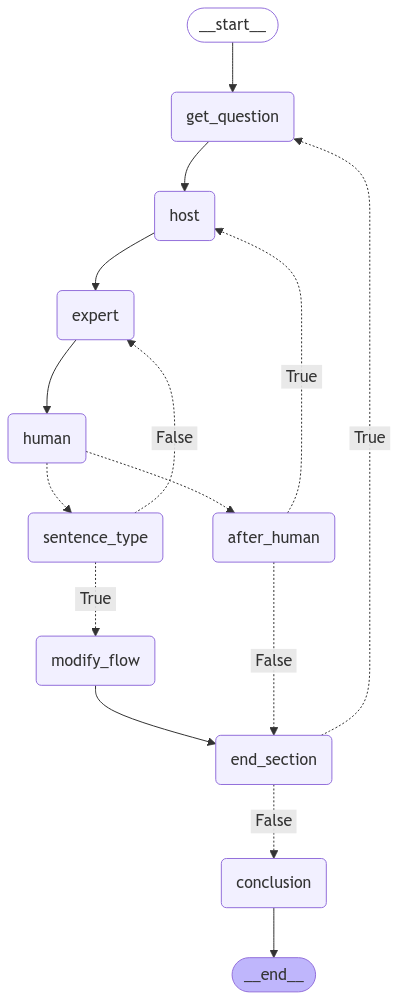

In [3]:
# interaction graph
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
from paperweave.graph.utterance_and_interaction import get_utterance_graph
from paperweave.graph.extraction_and_intro import init_and_intro_graph


interaction_graph = get_utterance_graph()

display(
    Image(
        init_and_intro_graph().get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

display(
    Image(
        interaction_graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


In [19]:
from langgraph.types import Command
import pprint
import json
import os

from paperweave.data_type import MyState

# Define the init_state and invoke the graph as done previously
init_state = {"podcast": {"paper": {"code": "1706.03762"}}}
# Define the filename using the code from the init_state
code = init_state["podcast"]["paper"]["code"]
filename = f"{code}.json"

# Check if the file already exists
if not os.path.exists(filename):
    # Write info_state to a JSON file with the filename derived from the code
    info_state = init_and_intro_graph().invoke(init_state, {"recursion_limit": 100})
    with open(filename, 'w') as file:
        json.dump(info_state, file)
else:
    with open(filename, 'r') as file:
        info_state = json.load(file)


config = {"configurable": {"thread_id": "paperweave_demo"}}


def get_last_utterance(chunk):
    state: MyState = list(chunk.values())[0]
    return state['podcast']['transcript'][-1]


def get_sections(chunk):
    state: MyState = list(chunk.values())[0]
    return state["sections"]


for chunk in interaction_graph.stream(info_state, config=config):
    print(chunk)

{'get_question': {'podcast': {'paper': {'text': 'Attention Is All You Need\n1 Introduction\n2 Background\n3 Model Architecture\n3.1 Encoder and Decoder Stacks\nEncoder:\nDecoder:\n3.2 Attention\n3.2.1 Scaled Dot-Product Attention\n3.2.2 Multi-Head Attention\n3.2.3 Applications of Attention in our Model\n3.3 Position-wise Feed-Forward Networks\n3.4 Embeddings and Softmax\n3.5 Positional Encoding\n4 Why Self-Attention\n5 Training\n5.1 Training Data and Batching\n5.2 Hardware and Schedule\n5.3 Optimizer\n5.4 Regularization\nResidual Dropout\nLabel Smoothing\n6 Results\n6.1 Machine Translation\n6.2 Model Variations\n6.3 English Constituency Parsing\n7 Conclusion\nAcknowledgements\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\nAttention Is All You Need\n\\ANDAshish Vaswani\nGoogle Brain\navaswani@google.com\n&Noam Shazeer11footnotemark: 1\nGoogle Brain\nnoam@googl

In [16]:
for chunk in interaction_graph.stream(Command(resume=""), config=config):
    print(chunk)

{'human': {'podcast': {'paper': {'text': 'Attention Is All You Need\n1 Introduction\n2 Background\n3 Model Architecture\n3.1 Encoder and Decoder Stacks\nEncoder:\nDecoder:\n3.2 Attention\n3.2.1 Scaled Dot-Product Attention\n3.2.2 Multi-Head Attention\n3.2.3 Applications of Attention in our Model\n3.3 Position-wise Feed-Forward Networks\n3.4 Embeddings and Softmax\n3.5 Positional Encoding\n4 Why Self-Attention\n5 Training\n5.1 Training Data and Batching\n5.2 Hardware and Schedule\n5.3 Optimizer\n5.4 Regularization\nResidual Dropout\nLabel Smoothing\n6 Results\n6.1 Machine Translation\n6.2 Model Variations\n6.3 English Constituency Parsing\n7 Conclusion\nAcknowledgements\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\nAttention Is All You Need\n\\ANDAshish Vaswani\nGoogle Brain\navaswani@google.com\n&Noam Shazeer11footnotemark: 1\nGoogle Brain\nnoam@google.com\n

In [17]:
for chunk in interaction_graph.stream(Command(resume="what does machine translation mean?"), config=config):
    print(chunk)

{'human': {'podcast': {'paper': {'text': 'Attention Is All You Need\n1 Introduction\n2 Background\n3 Model Architecture\n3.1 Encoder and Decoder Stacks\nEncoder:\nDecoder:\n3.2 Attention\n3.2.1 Scaled Dot-Product Attention\n3.2.2 Multi-Head Attention\n3.2.3 Applications of Attention in our Model\n3.3 Position-wise Feed-Forward Networks\n3.4 Embeddings and Softmax\n3.5 Positional Encoding\n4 Why Self-Attention\n5 Training\n5.1 Training Data and Batching\n5.2 Hardware and Schedule\n5.3 Optimizer\n5.4 Regularization\nResidual Dropout\nLabel Smoothing\n6 Results\n6.1 Machine Translation\n6.2 Model Variations\n6.3 English Constituency Parsing\n7 Conclusion\nAcknowledgements\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\nAttention Is All You Need\n\\ANDAshish Vaswani\nGoogle Brain\navaswani@google.com\n&Noam Shazeer11footnotemark: 1\nGoogle Brain\nnoam@google.com\n

In [18]:
for chunk in interaction_graph.stream(Command(resume="jump to the history"), config=config):
    print(chunk)

{'human': {'podcast': {'paper': {'text': 'Attention Is All You Need\n1 Introduction\n2 Background\n3 Model Architecture\n3.1 Encoder and Decoder Stacks\nEncoder:\nDecoder:\n3.2 Attention\n3.2.1 Scaled Dot-Product Attention\n3.2.2 Multi-Head Attention\n3.2.3 Applications of Attention in our Model\n3.3 Position-wise Feed-Forward Networks\n3.4 Embeddings and Softmax\n3.5 Positional Encoding\n4 Why Self-Attention\n5 Training\n5.1 Training Data and Batching\n5.2 Hardware and Schedule\n5.3 Optimizer\n5.4 Regularization\nResidual Dropout\nLabel Smoothing\n6 Results\n6.1 Machine Translation\n6.2 Model Variations\n6.3 English Constituency Parsing\n7 Conclusion\nAcknowledgements\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\nAttention Is All You Need\n\\ANDAshish Vaswani\nGoogle Brain\navaswani@google.com\n&Noam Shazeer11footnotemark: 1\nGoogle Brain\nnoam@google.com\n